## The visualization Project:
## this project is concerning the 201902 Ford go bike trip data.
### The works down here are representing my code work and exploration work in addtion to the explanatory work concerning the previous data of ford go bike. 

### First about this project i engoyed the work here and i know that the project is measured against rubric but i did what appeared interesting to me and followed a trend and it giveme a convincing results in which i hope to be the same for you.

### About the data under investigation:
#### I downloaded the data from the Udacity resources in the same time i tried to use the ford go bike data in the Data Option but the link directed me to the main Ford web site and it was of no use for me.

## The nature of data set and wrangling efforts;
### It took me into two stages:
#### The first wrangling stage according to the nature of the dataset.
#### The second wrangling stage according to the aim i want to achive and points want to explain.

## The Data Wrangling;
#### The data consist of 16 column and (seven) of them will be dropped like ( start_station_latitude, start_station_longitude).
#### The trip duration listed in seconds and when dealing with it was not representive so need to be in minutes.
####  After trasformation the duration in sec column will be dropped.
#### The null values in the dataset happen in 8688 rows will be removed.
#### Extracting date and time from start and end time into (four) columns for start and end (time and date).
#### Changing Start date and End date columns into datetime formate.
#### Extracting start and end day of the week from start date and end date columns.
#### Changing the member_birth_year column into (int) to extract the year from.
#### developing a new column called (age)

In [1]:
# Importing the necessary liberaries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import io

%matplotlib inline

In [2]:
# importing and opening the dataset of concern.
df = pd.read_csv('201902-fordgobike-tripdata.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### The main exploration step for the dataset upon which the wrangling step prepared and pointed out.

In [3]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.401,13.0,Commercial St at Montgomery St,37.7942,-122.402923,4902.0,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391,81.0,Berry St at 4th St,37.7759,-122.393170,2535.0,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.427,3.0,Powell St BART Station (Market St at 4th St),37.7864,-122.404904,5905.0,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.447,70.0,Central Ave at Fell St,37.7733,-122.444293,6638.0,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.272,222.0,10th Ave at E 15th St,37.7927,-122.248780,4898.0,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188280 entries, 0 to 188279
Data columns (total 16 columns):
duration_sec               188280 non-null int64
start_time                 188280 non-null object
end_time                   188280 non-null object
start_station_id           188079 non-null float64
start_station_name         188079 non-null object
start_station_latitude     188280 non-null float64
start_station_longitude    188280 non-null object
end_station_id             188079 non-null float64
end_station_name           188079 non-null object
end_station_latitude       188280 non-null object
end_station_longitude      188279 non-null float64
bike_id                    188279 non-null float64
user_type                  188279 non-null object
member_birth_year          179791 non-null float64
member_gender              179791 non-null object
bike_share_for_all_trip    188279 non-null object
dtypes: float64(6), int64(1), object(9)
memory usage: 23.0+ MB


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,end_station_id,end_station_longitude,bike_id,member_birth_year
count,188280.000000,188079.000000,188280.000000,188079.000000,188279.000000,188279.000000,179791.000000
mean,725.415041,138.504739,37.795622,136.359929,-122.352325,4479.528508,1984.809379
std,1785.963941,111.785818,10.535380,111.549218,0.116540,1664.780452,10.111496
min,61.000000,3.000000,37.317298,3.000000,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770407,44.000000,-122.411726,3787.000000,1980.000000
50%,514.000000,104.000000,37.780760,100.000000,-122.398279,4962.000000,1987.000000
75%,796.000000,239.000000,37.797280,235.000000,-122.288045,5510.000000,1992.000000
max,85444.000000,398.000000,4609.000000,1987.000000,-121.874119,6645.000000,2001.000000


In [6]:
df.shape

(188280, 16)

In [7]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude     object
end_station_id             float64
end_station_name            object
end_station_latitude        object
end_station_longitude      float64
bike_id                    float64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

## The main step of dataset cleaning by making copy from Datafram.
## And starting the wrangling and cleaning step to give tiddy and clean dataset.

In [8]:
# Mking a copy of the datefram.
df_copy = df

In [9]:
df_copy.shape

(188280, 16)

In [10]:
# Dropping the un necessary columns.
df_copy.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude'
            , 'end_station_longitude', 'bike_id'], inplace=True, axis = 1)

In [11]:
# transfering the seconds into minutes.
df_copy['duration_min']=df_copy['duration_sec']/60

In [12]:
# Droping the duration _sec column.
df_copy.drop(['duration_sec'], inplace=True, axis = 1)

In [13]:
# configuring the data set to make sure of the changing.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188280 entries, 0 to 188279
Data columns (total 9 columns):
start_time                 188280 non-null object
end_time                   188280 non-null object
start_station_name         188079 non-null object
end_station_name           188079 non-null object
user_type                  188279 non-null object
member_birth_year          179791 non-null float64
member_gender              179791 non-null object
bike_share_for_all_trip    188279 non-null object
duration_min               188280 non-null float64
dtypes: float64(2), object(7)
memory usage: 12.9+ MB


In [14]:
df_copy.shape

(188280, 9)

### Find out the null or Nan in the data set and dropping them.

In [15]:
df_copy.isnull().sum()

start_time                    0
end_time                      0
start_station_name          201
end_station_name            201
user_type                     1
member_birth_year          8489
member_gender              8489
bike_share_for_all_trip       1
duration_min                  0
dtype: int64

In [16]:
is_NaN = df_copy.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

                      start_time                  end_time  \
1       2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
13      2019-02-28 23:49:06.0620  2019-03-01 00:04:21.8670   
28      2019-02-28 23:43:27.5030  2019-02-28 23:54:18.4510   
53      2019-02-28 22:41:16.3620  2019-02-28 23:38:14.3630   
65      2019-02-28 23:17:05.8530  2019-02-28 23:32:32.6820   
147     2019-02-28 22:46:19.1140  2019-02-28 22:52:31.4770   
176     2019-02-28 22:28:50.5140  2019-02-28 22:41:00.8970   
220     2019-02-28 22:05:25.5530  2019-02-28 22:29:11.1180   
266     2019-02-28 21:53:13.2740  2019-02-28 22:14:56.1730   
292     2019-02-28 21:43:04.3630  2019-02-28 22:07:32.6640   
323     2019-02-28 21:52:54.9590  2019-02-28 21:57:30.5860   
329     2019-02-28 21:45:47.5210  2019-02-28 21:56:02.0820   
369     2019-02-28 21:34:04.0330  2019-02-28 21:47:08.2180   
371     2019-02-28 21:41:14.0510  2019-02-28 21:46:34.7440   
407     2019-02-28 21:32:00.4030  2019-02-28 21:38:22.9040   
422     

In [17]:
df_copy.dropna(inplace=True)

In [18]:
# Dropping Nan confirmation
df_copy.isnull().sum()

start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
dtype: int64

In [19]:
# Confirming the removal of null in the data set
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179592 entries, 0 to 188279
Data columns (total 9 columns):
start_time                 179592 non-null object
end_time                   179592 non-null object
start_station_name         179592 non-null object
end_station_name           179592 non-null object
user_type                  179592 non-null object
member_birth_year          179592 non-null float64
member_gender              179592 non-null object
bike_share_for_all_trip    179592 non-null object
duration_min               179592 non-null float64
dtypes: float64(2), object(7)
memory usage: 13.7+ MB


In [20]:
df_copy.head(5)

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000
2,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000
3,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667
4,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667
5,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333


#### Extracting date and time from start and end time into (four) columns for start and end (time and date).

In [21]:
df_copy['start_date'] = pd.to_datetime(df_copy['start_time']).dt.date
df_copy['start_time'] = pd.to_datetime(df_copy['start_time']).dt.time

In [22]:
df_copy['end_date'] = pd.to_datetime(df_copy['end_time']).dt.date
df_copy['end_time'] = pd.to_datetime(df_copy['end_time']).dt.time

In [23]:
df_copy['start_day'] = df_copy['start_date'].apply(lambda r:r.day).astype(int)
df_copy['end_day'] = df_copy['end_date'].apply(lambda r:r.day).astype(int)

df_copy.head(5)

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,end_date,start_day,end_day
0,17:32:10.145000,08:01:55.975000,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000,2019-02-28,2019-03-01,28,1
2,12:13:13.218000,05:24:08.146000,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000,2019-02-28,2019-03-01,28,1
3,17:54:26.010000,04:02:36.842000,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667,2019-02-28,2019-03-01,28,1
4,23:54:18.549000,00:20:44.074000,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,2019-03-01,28,1
5,23:49:58.632000,00:19:51.760000,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333,2019-02-28,2019-03-01,28,1


In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179592 entries, 0 to 188279
Data columns (total 13 columns):
start_time                 179592 non-null object
end_time                   179592 non-null object
start_station_name         179592 non-null object
end_station_name           179592 non-null object
user_type                  179592 non-null object
member_birth_year          179592 non-null float64
member_gender              179592 non-null object
bike_share_for_all_trip    179592 non-null object
duration_min               179592 non-null float64
start_date                 179592 non-null object
end_date                   179592 non-null object
start_day                  179592 non-null int64
end_day                    179592 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 19.2+ MB


#### Changing Start date and End date columns into datetime formate.

In [25]:
df_copy['start_date'] = pd.to_datetime(df_copy['start_date'])
df_copy['end_date'] = pd.to_datetime(df_copy['end_date'])

In [26]:
df_copy.dtypes

start_time                         object
end_time                           object
start_station_name                 object
end_station_name                   object
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
duration_min                      float64
start_date                 datetime64[ns]
end_date                   datetime64[ns]
start_day                           int64
end_day                             int64
dtype: object

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179592 entries, 0 to 188279
Data columns (total 13 columns):
start_time                 179592 non-null object
end_time                   179592 non-null object
start_station_name         179592 non-null object
end_station_name           179592 non-null object
user_type                  179592 non-null object
member_birth_year          179592 non-null float64
member_gender              179592 non-null object
bike_share_for_all_trip    179592 non-null object
duration_min               179592 non-null float64
start_date                 179592 non-null datetime64[ns]
end_date                   179592 non-null datetime64[ns]
start_day                  179592 non-null int64
end_day                    179592 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 19.2+ MB


#### Extracting start and end day of the week from start date and end date columns.

In [28]:
df_copy['start_day_of_trip'] = df_copy[['start_date']].apply(lambda x: dt.datetime.strftime(x['start_date'], '%A'), axis=1)


In [29]:
df_copy['end_day_of_trip'] = df_copy[['end_date']].apply(lambda x: dt.datetime.strftime(x['end_date'], '%A'), axis=1)

In [30]:
df_copy.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,end_date,start_day,end_day,start_day_of_trip,end_day_of_trip
0,17:32:10.145000,08:01:55.975000,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000,2019-02-28,2019-03-01,28,1,Thursday,Friday
2,12:13:13.218000,05:24:08.146000,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000,2019-02-28,2019-03-01,28,1,Thursday,Friday
3,17:54:26.010000,04:02:36.842000,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667,2019-02-28,2019-03-01,28,1,Thursday,Friday
4,23:54:18.549000,00:20:44.074000,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,2019-03-01,28,1,Thursday,Friday
5,23:49:58.632000,00:19:51.760000,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333,2019-02-28,2019-03-01,28,1,Thursday,Friday


#### Changing the member_birth_year column into (int) to extract the year from.

In [31]:
df['member_birth_year'] = pd.to_numeric(df['member_birth_year'])

In [32]:
df['member_birth_year'].astype(int)

0         1984
2         1972
3         1989
4         1974
5         1959
6         1983
7         1989
8         1988
9         1992
10        1996
11        1993
12        1990
14        1988
15        1993
16        1981
17        1975
18        1990
19        1978
20        1983
21        1984
22        1991
23        1997
24        1975
25        1986
26        2000
27        1982
29        1995
30        1996
31        1993
32        1980
          ... 
188249    1997
188250    1988
188251    1997
188252    1991
188253    1945
188254    1998
188255    1999
188256    1927
188257    1985
188258    1999
188259    1980
188260    1993
188261    1985
188262    1975
188263    1993
188264    1991
188265    1988
188266    1982
188267    1993
188268    1984
188269    1991
188271    2000
188272    1980
188273    1984
188274    1988
188275    1996
188276    1984
188277    1990
188278    1988
188279    1989
Name: member_birth_year, Length: 179592, dtype: int64

#### developing a new column called (age)

In [33]:
df_copy['age'] = 2019 - df_copy['member_birth_year']

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179592 entries, 0 to 188279
Data columns (total 16 columns):
start_time                 179592 non-null object
end_time                   179592 non-null object
start_station_name         179592 non-null object
end_station_name           179592 non-null object
user_type                  179592 non-null object
member_birth_year          179592 non-null float64
member_gender              179592 non-null object
bike_share_for_all_trip    179592 non-null object
duration_min               179592 non-null float64
start_date                 179592 non-null datetime64[ns]
end_date                   179592 non-null datetime64[ns]
start_day                  179592 non-null int64
end_day                    179592 non-null int64
start_day_of_trip          179592 non-null object
end_day_of_trip            179592 non-null object
age                        179592 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(9)
memory usage:

In [35]:
df_copy.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,end_date,start_day,end_day,start_day_of_trip,end_day_of_trip,age
0,17:32:10.145000,08:01:55.975000,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869.750000,2019-02-28,2019-03-01,28,1,Thursday,Friday,35.0
2,12:13:13.218000,05:24:08.146000,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.900000,2019-02-28,2019-03-01,28,1,Thursday,Friday,47.0
3,17:54:26.010000,04:02:36.842000,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.166667,2019-02-28,2019-03-01,28,1,Thursday,Friday,30.0
4,23:54:18.549000,00:20:44.074000,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,2019-03-01,28,1,Thursday,Friday,45.0
5,23:49:58.632000,00:19:51.760000,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,29.883333,2019-02-28,2019-03-01,28,1,Thursday,Friday,60.0


### The first step of data visualization, exploration  and explanation by configuring the various types of columns.

In [36]:
df_copy['start_day_of_trip'].value_counts()

Thursday     38020
Tuesday      30584
Wednesday    28426
Friday       27995
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day_of_trip, dtype: int64

In [37]:
df_copy['end_day_of_trip'].value_counts()

Thursday     38010
Tuesday      30591
Wednesday    28417
Friday       27992
Monday       25641
Sunday       14519
Saturday     14422
Name: end_day_of_trip, dtype: int64

In [38]:
df_copy['member_gender'].describe()

count     179592
unique         3
top         Male
freq      133916
Name: member_gender, dtype: object

In [39]:
df_copy['end_day_of_trip'].describe()

count       179592
unique           7
top       Thursday
freq         38010
Name: end_day_of_trip, dtype: object

In [40]:
df_copy['start_day_of_trip'].describe()

count       179592
unique           7
top       Thursday
freq         38020
Name: start_day_of_trip, dtype: object

In [41]:
df_copy['start_day'].describe()

count    179592.000000
mean         15.461134
std           7.982037
min           1.000000
25%           8.000000
50%          16.000000
75%          22.000000
max          28.000000
Name: start_day, dtype: float64

In [42]:
df_copy['end_day'].describe()

count    179592.000000
mean         15.460555
std           7.982267
min           1.000000
25%           8.000000
50%          16.000000
75%          22.000000
max          28.000000
Name: end_day, dtype: float64

In [43]:
df_copy['start_date'].describe()

count                  179592
unique                     28
top       2019-02-21 00:00:00
freq                    13428
first     2019-02-01 00:00:00
last      2019-02-28 00:00:00
Name: start_date, dtype: object

In [44]:
df_copy['end_date'].describe()

count                  179592
unique                     29
top       2019-02-21 00:00:00
freq                    13428
first     2019-02-01 00:00:00
last      2019-03-01 00:00:00
Name: end_date, dtype: object

In [45]:
df_copy['start_time'].describe()

count              179592
unique             174648
top       16:13:47.513000
freq                    3
Name: start_time, dtype: object

In [46]:
df_copy['end_time'].describe()

count              179592
unique             174622
top       22:16:04.478000
freq                    4
Name: end_time, dtype: object

In [47]:
df_copy['duration_min'].describe()

count    179592.000000
mean         11.722707
std          27.265254
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [48]:
np.log10(df_copy['duration_min']).describe()

count    179592.000000
mean          0.929580
std           0.304996
min           0.007179
25%           0.731051
50%           0.929419
75%           1.118926
max           3.148952
Name: duration_min, dtype: float64

In [49]:
df_copy['user_type'].describe()

count         179592
unique             2
top       Subscriber
freq          162610
Name: user_type, dtype: object

In [50]:
df_copy['member_birth_year'].describe()

count    179592.000000
mean       1984.806205
std          10.113561
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

### Univariant exploration 

### In this step i will explore the various items or column in the data set to find out the desied elements for me.

Text(0.5,0,'end_day_of_trip')

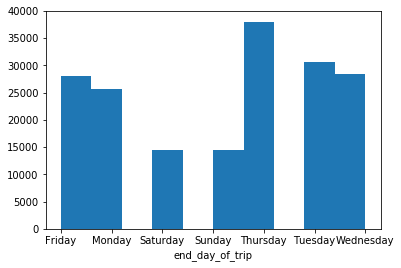

In [51]:
plt.hist(data = df_copy, x = 'end_day_of_trip');
plt.xlabel('end_day_of_trip')

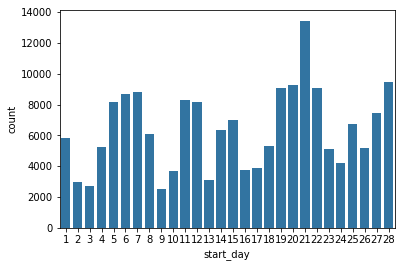

In [52]:
sb.countplot(data=df_copy,x='start_day', color=sb.color_palette()[0])

#### As for the days of the week, the result was relatively amazing to me. It seems that the weekends have witnessed a significant decrease in the ridding of cycling. It seems that it is a real holiday, and it seems that a significant percentage of the population uses bicycles in their daily routine

#### In addition the idea dealing with how about the frequency during the month of concern showed a variation in count of ridding  but supported the weekly conclusion related to the low rate in the weekends 

Text(0.5,0,'user_type')

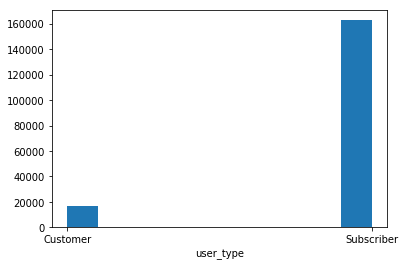

In [53]:
plt.hist(data = df_copy, x = 'user_type');
plt.xlabel('user_type')

#### For the user type it is traditional the subscriber is huge against customers it seems that the loyality programs is good but it is just a guess from the results.

Text(0.5,0,'duration_min')

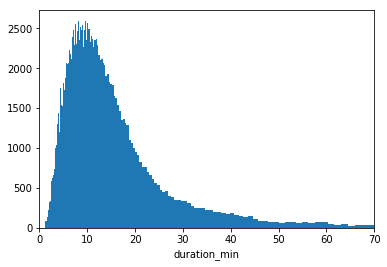

In [54]:
bins = 10 ** np.arange(0.1, 3.14+0.01, 0.01)
plt.hist(data = df_copy, x = 'duration_min', bins = bins);
plt.xlim([0,70])
plt.xlabel('duration_min')

#### At this point i had to transfer the original data to (log) to figure out the shape of data and as it seems it is highly skewed to the right so the majority of the riders tends to use the ride for may be fro (10-20 minutes) per day while others for many more time. 

Text(0.5,0,'member_birth_year')

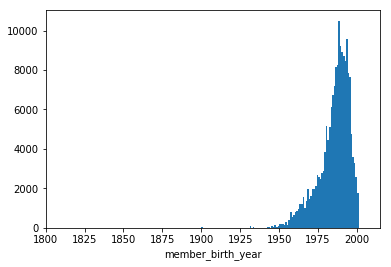

In [55]:
bins = np.arange(1878, 2001+1, 1)
plt.hist(data = df_copy, x = 'member_birth_year', bins = bins);
plt.xlim([1800,2015])
plt.xlabel('member_birth_year')

#### The birth year is another amazing factor it seems that in that city there are ridders exceded in age 100 years which needs more investigations about the validity of the data is it true or not and if true we need to standout the reasons about that fact which is appearing in the left skewenes.

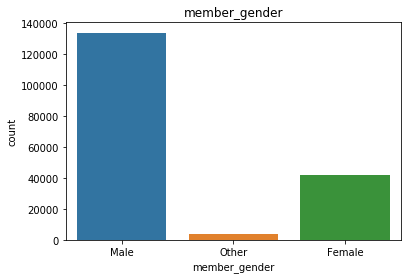

In [56]:
sb.countplot(data = df_copy, x = 'member_gender')
plt.title('member_gender');

#### I am sorry men competing hardly it is a big deference in favor to men.

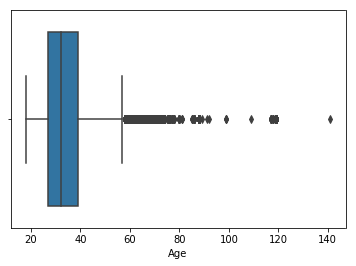

In [57]:
sb.boxplot(data=df_copy, x='age', color=sb.color_palette()[0]);
plt.xlabel('Age');

#### Just for the records the extreme outliers in age highlighting the fact that many are ridding who exceded the 90 years

### The univariant explanation:
#### After exploring many items in the dataset i found out many interesting things as follows;
##### It is worth noting that on Thursday of every week there is a noticeable activity for riding the stairs, unlike the weekend which is witnessing a remarkable decline and also balanced activity for the rest of the days of the week. The number of subscribers is much greater than the tenants, which at the same time represents an economic activity with more opportunities Taking into account that in terms of marketing, attention should be given to females more than that due to the variation in interest indicated by the difference in the ratio between males and females

### Bivariant exploration

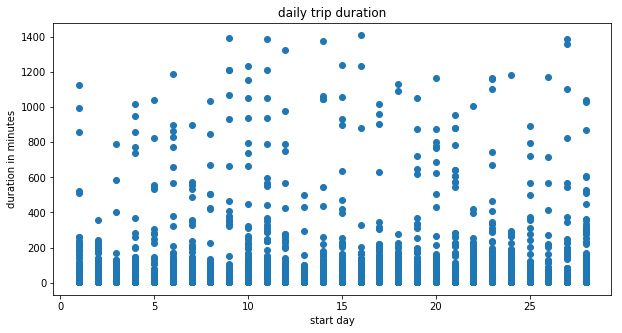

In [58]:
plt.figure(figsize = [10,5])
plt.scatter(data = df_copy , x = 'start_day' , y = 'duration_min' , alpha = 1 )
plt.title('daily trip duration')
plt.xlabel('start day')
plt.ylabel('duration in minutes');

#### Here I will combin another factor to have a better vision and all moving around the relation between the duration ( which represent the consumption here) and another factors to judge it better.
#### The relation between the start day of the week and duration in minutes the rate is maintained the work days is better in ridding and duration.

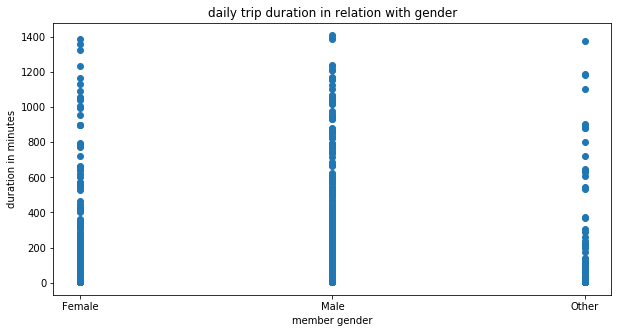

In [59]:
plt.figure(figsize = [10,5])
plt.scatter(data = df_copy , x = 'member_gender' , y = 'duration_min' , alpha = 1 )
plt.title('daily trip duration in relation with gender')
plt.xlabel('member gender')
plt.ylabel('duration in minutes');

#### The men are the most ridder in the city and a segmented marketing targeting the women and other need to be done.

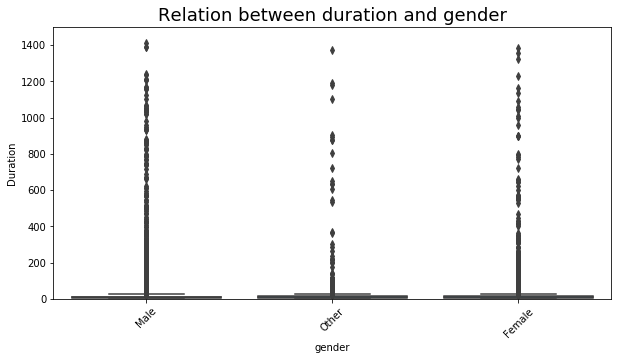

In [60]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (10,5))
yticks = [1, 5, 10, 50, 100, 500, 1000, 1500]
sb.boxplot(data = df_copy, x = 'member_gender', y = 'duration_min', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 1500);
plt.title('Relation between duration and gender', fontsize = 18);
plt.xlabel('gender');
plt.ylabel('Duration')
plt.yticks();

#### The box plot for men showed relative increase in the ratios but a noticable outliers in favour to men.

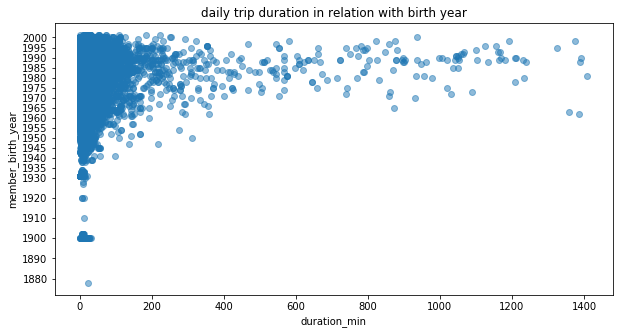

In [61]:
plt.figure(figsize = [10,5])
ticks = [1880, 1890, 1900, 1910, 1920, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000]
plt.scatter(data = df_copy , x = 'duration_min' , y = 'member_birth_year' , alpha = 0.5 )
plt.title('daily trip duration in relation with birth year')
plt.xlabel('duration_min')
plt.ylabel('member_birth_year');
plt.yticks(ticks);

#### Another point i wanted to explore is the relation between birth year or the ridder age and the duration and it showed the the relative increase in the segment between 1980 to 2000.

### The bivariant explanation

#### Adding an element to another element helps to clarify things or may lead to obliterating them, but in our case this adding a second element to the equation led to the consolidation of the discovered facts and proposals submitted to the decision-maker regarding the age or age, as well as the gender or type of interest in different age groups And also focus on the female.

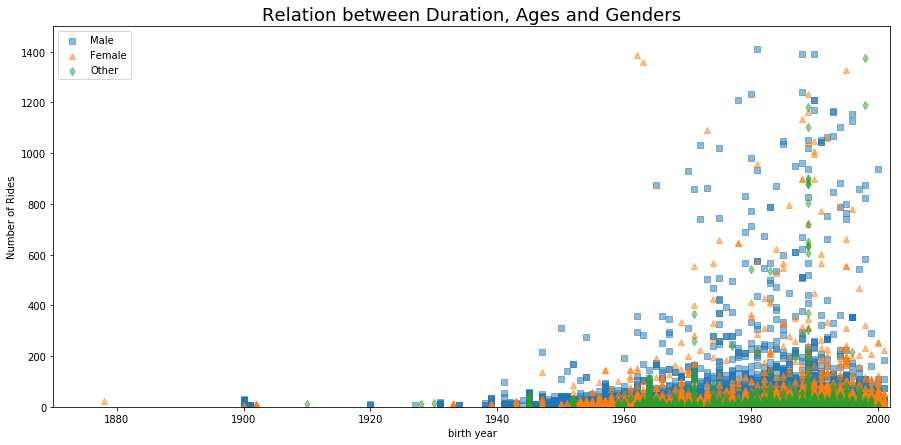

In [62]:
plt.figure(figsize = (15,7))

cat_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'd']]

for cat, marker in cat_markers:
    df_gender = df_copy[df_copy['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'member_birth_year', y = 'duration_min', marker = marker, alpha = 0.5);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(1870, 2002);
plt.ylim(0, 1500);
plt.title('Relation between Duration, Ages and Genders', fontsize = 18);
plt.xlabel('birth year');
plt.ylabel('Number of Rides');


#### Men in the birth year ranging 1980 - 2000 are most ridders way the way not necessary the best but facts dealing with percents not skills

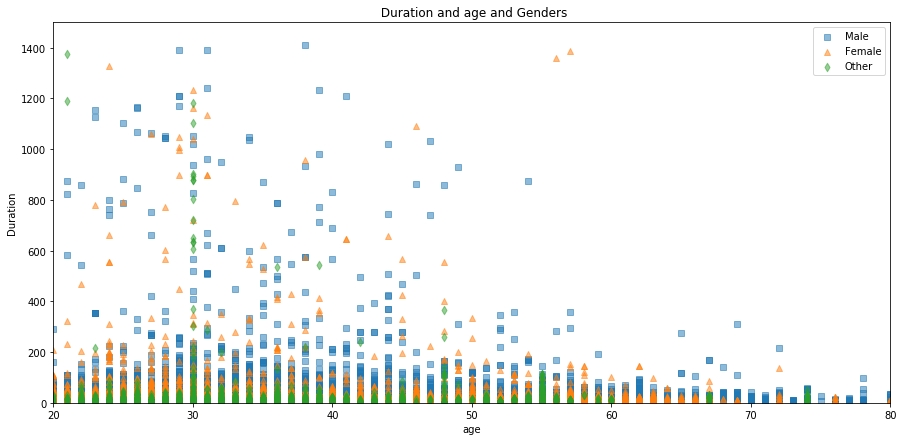

In [63]:
plt.figure(figsize = (15,7))

cat_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'd']]

for cat, marker in cat_markers:
    df_gender = df_copy[df_copy['member_gender'] == cat]
    plt.scatter(data = df_gender, x = 'age', y = 'duration_min', marker = marker, alpha = 0.5);
plt.legend(['Male', 'Female', 'Other']);
plt.xlim(20, 80);
plt.ylim(0, 1500);
plt.title(' Duration and age and Genders', fontsize = 12);
plt.xlabel('age');
plt.ylabel('Duration');

#### To figure out the relation i extracted the age from the birth year to find it better or to see it better.

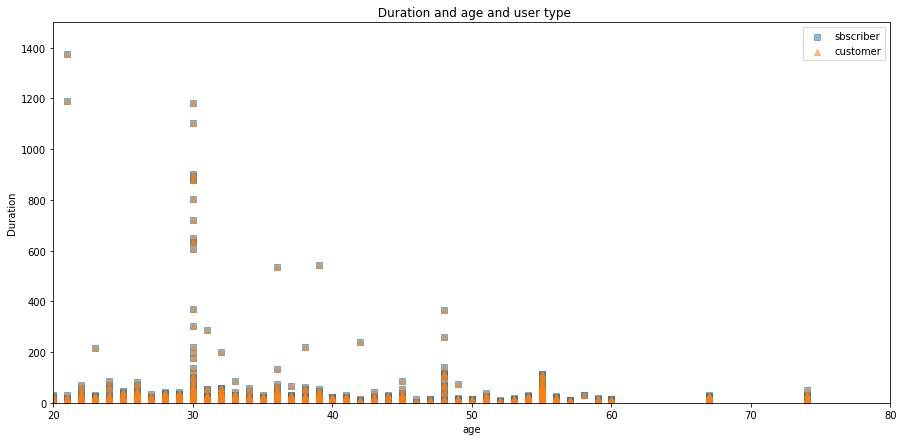

In [64]:
plt.figure(figsize = (15,7))

cat_markers = [['subscriber', 's'],
               ['customer', '^']]

for cat, marker in cat_markers:
    df_user = df_copy[df_copy['user_type'] == cat]
    plt.scatter(data = df_gender, x = 'age', y = 'duration_min', marker = marker, alpha = 0.5);
plt.legend(['sbscriber', 'customer']);
plt.xlim(20, 80);
plt.ylim(0, 1500);
plt.title(' Duration and age and user type', fontsize = 12);
plt.xlabel('age');
plt.ylabel('Duration');

#### The same point is tested between the age and user type in relation with duration give out that subscribers are competing during the age cycle.

### Multivariant explanation
#### The addition of a new element to the equation supported the same course of speech and expectations regarding the relationship of each of the contestant's type, gender, and age, or more precisely, the year in which he was born, supported by the previous conclusions, which will be listed in the summary.

## Conclusion
#### The focus of my attention was the first thing I examined the information available to me about renting bicycles from Ford and regarding February of 2019 to find the vital points that may affect the rate and amount of use. I focused my focus on the human factor in the main, because I believe it is the most important factor in Regarding gender, age, and from a commercial point of view, days of the week, and the type of passenger, is he a subscriber or a regular customer.
#### And it has become evident to me that the number of males is much greater than the number of females, and it seems that they want more attention, for example, by putting feminine touches on degrees or colors or even pictures of heroines on bicycles.
#### Also, the number of subscribers to regular customers indicates that subscription programs were available, which led to an increase in the number of subscribers, which is a good thing.
#### What astonished me while studying the available information was the age of the riders, which seems to have exceeded the ninety years at times and is a very good thing and can be used if it is correct in the propaganda and advertising.